In [1]:
import numpy as np
from PIL import Image
import glob
import re

In [2]:
IMGS_DIR = "character_imgs/ascii/CascadiaMono/"

In [3]:
img = Image.open(IMGS_DIR + "100.bmp")
img_arr = np.array(img)

img_size = img_arr.size
img_shape = img_arr.shape
if (img_arr.shape[0] % 2):
    img_arr = np.delete(img_arr, img_arr.shape[0] // 2, 0)

print(img_size, img_shape)
print(np.split(img_arr, 2)[0].shape)
img

190 (19, 10)
(9, 10)


In [4]:
img_ls = glob.glob(IMGS_DIR + "*.bmp")
char_ls = {}
for i in range(0, len(img_ls)):
    img = Image.open(img_ls[i])
    img = np.array(img)
    if (img.shape[0] % 2):
        img = np.delete(img, img.shape[0] // 2, 0)
    img_top_bottom = np.split(img, 2)
    char_ls[chr(int(re.findall(r'\d+', img_ls[i])[0]))] = (
                (img_top_bottom[0] > 0).sum() / (img.size / 2),
                (img_top_bottom[1] > 0).sum() / (img.size / 2))


In [5]:
brightness_ls = sorted(list(char_ls.items()), key=lambda a: (a[1][0], a[1][1]))

print(brightness_ls)

[(' ', (0.0, 0.0)), ('.', (0.0, 0.08888888888888889)), ('-', (0.0, 0.1)), (',', (0.0, 0.17777777777777778)), ('_', (0.0, 0.2)), (':', (0.06666666666666667, 0.08888888888888889)), ('~', (0.06666666666666667, 0.16666666666666666)), (';', (0.06666666666666667, 0.17777777777777778)), ('u', (0.08888888888888889, 0.36666666666666664)), ('L', (0.1111111111111111, 0.24444444444444444)), ('+', (0.13333333333333333, 0.2)), ('v', (0.13333333333333333, 0.28888888888888886)), ('y', (0.13333333333333333, 0.4888888888888889)), ('o', (0.14444444444444443, 0.32222222222222224)), ('e', (0.14444444444444443, 0.37777777777777777)), ('a', (0.14444444444444443, 0.4777777777777778)), ('n', (0.15555555555555556, 0.2777777777777778)), ('x', (0.15555555555555556, 0.3111111111111111)), ('z', (0.15555555555555556, 0.3111111111111111)), ('s', (0.15555555555555556, 0.35555555555555557)), ("'", (0.16666666666666666, 0.0)), ('`', (0.16666666666666666, 0.0)), ('!', (0.16666666666666666, 0.14444444444444443)), ('c', (0

In [6]:
import matplotlib.pyplot as plt

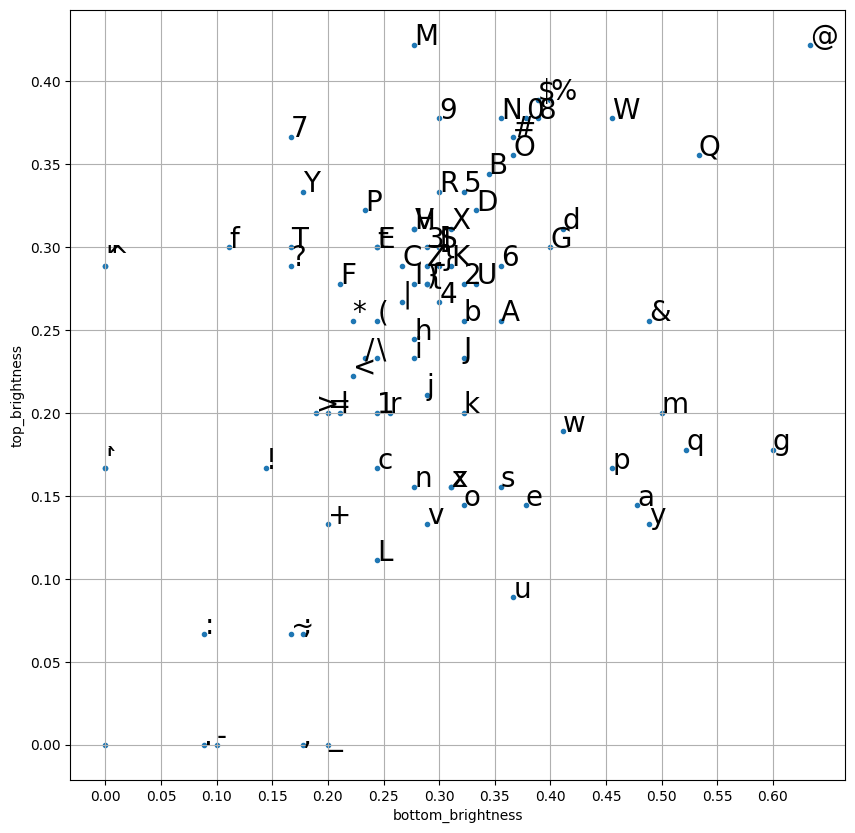

In [7]:
plt.figure(figsize=(10, 10))
top_brightness = [a[1][0] for a in brightness_ls]
bottom_brightness = [a[1][1] for a in brightness_ls]
plt.scatter(bottom_brightness, top_brightness, marker='.')
plt.xticks(np.arange(min(bottom_brightness), max(bottom_brightness), 0.05))
plt.yticks(np.arange(min(top_brightness), max(top_brightness), 0.05))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(char_ls)):
    plt.annotate(brightness_ls[i][0], (bottom_brightness[i], top_brightness[i]), size=20)
plt.grid()

In [8]:
y_dim = 9
x_dim = 9
brightness_arr = [[''] * x_dim for _ in range(y_dim)]

n_top_brightness = list(map(lambda b: b / max(top_brightness), top_brightness))
n_bottom_brightness = list(map(lambda b: b / max(bottom_brightness), bottom_brightness))

char_to_n_bt_brightness = {}
for b in zip(brightness_ls, n_top_brightness, n_bottom_brightness):
    char_to_n_bt_brightness[b[0][0]] = (b[1], b[2], (b[1] + b[2]) / 2)

for c, b in char_to_n_bt_brightness.items():
    brightness_arr[int(b[0] * (y_dim - 1))][int(b[1] * (x_dim - 1))] += c

for row in brightness_arr:
    print(row)

[' ', '.-', ',_', '', '', '', '', '', '']
['', ':', '~;', '', 'u', '', '', '', '']
['', '', '+', 'Lvnxz', 'oes', '', 'ya', '', '']
["'`", '!', '>=l', 'c1r', 'k', 'pw', 'qm', 'g', '']
['', '', '</*', 'j\\ih(', 'JbA', '', '&', '', '']
['"^', 'f', 'F?T', '|4I{)CZ}KtE3S[]HVX', '2U6', 'Gd', '', '', '']
['', '', 'PY7', 'R', 'D5BO#', '', 'Q', '', '']
['', '', '', '9', 'N08$', 'W%', '', '', '']
['', '', '', 'M', '', '', '', '', '@']


In [9]:
def splice_cell(top, left):
    res = top[0]
    for a in top:
        if (char_to_n_bt_brightness[res][2] < char_to_n_bt_brightness[a][2]):
            res = a

    for a in left:
        if (char_to_n_bt_brightness[res][2] < char_to_n_bt_brightness[a][2]):
            res = a
    return res


for y in range(y_dim):
    for x in range(x_dim):
        if brightness_arr[y][x] == '':
            if x > 0 and y > 0:
                brightness_arr[y][x] += splice_cell(brightness_arr[y-1][x], brightness_arr[y][x-1])
            elif x > 0:
                brightness_arr[y][x] += brightness_arr[y][x - 1][-1]
            elif y > 0:
                brightness_arr[y][x] += brightness_arr[y - 1][x][-1]
            brightness_arr[y][x] = ''.join(set(brightness_arr[y][x]))

for row in brightness_arr:
    print(row)

[' ', '.-', ',_', '_', '_', '_', '_', '_', '_']
[' ', ':', '~;', ';', 'u', 'u', 'u', 'u', 'u']
[' ', ':', '+', 'Lvnxz', 'oes', 'e', 'ya', 'a', 'a']
["'`", '!', '>=l', 'c1r', 'k', 'pw', 'qm', 'g', 'g']
['`', '!', '</*', 'j\\ih(', 'JbA', 'A', '&', '&', '&']
['"^', 'f', 'F?T', '|4I{)CZ}KtE3S[]HVX', '2U6', 'Gd', 'd', 'd', 'd']
['^', 'f', 'PY7', 'R', 'D5BO#', '#', 'Q', 'Q', 'Q']
['^', 'f', 'P', '9', 'N08$', 'W%', 'Q', 'Q', 'Q']
['^', 'f', 'P', 'M', '$', 'W', 'Q', 'Q', '@']


In [13]:
for y in range(y_dim):
    for x in range(x_dim):
        num_chars = len(brightness_arr[y][x])
        if num_chars > 1:
            brightness_arr[y][x] = brightness_arr[y][x][num_chars // 2 - 1]

b_set = set()
for row in brightness_arr:
    b_set = b_set.union(set(row))
    #print(' '.join(row))
    print(row)

print(len(b_set))

[' ', '.', ',', '_', '_', '_', '_', '_', '_']
[' ', ':', '~', ';', 'u', 'u', 'u', 'u', 'u']
[' ', ':', '+', 'v', 'o', 'e', 'y', 'a', 'a']
["'", '!', '>', 'c', 'k', 'p', 'q', 'g', 'g']
['`', '!', '<', '\\', 'J', 'A', '&', '&', '&']
['"', 'f', 'F', 'K', '2', 'G', 'd', 'd', 'd']
['^', 'f', 'P', 'R', '5', '#', 'Q', 'Q', 'Q']
['^', 'f', 'P', '9', '0', 'W', 'Q', 'Q', 'Q']
['^', 'f', 'P', 'M', '$', 'W', 'Q', 'Q', '@']
47


In [11]:
b_list = []
for c in b_set:
    b_list.append((c, char_ls.get(c)))

b_list.sort(key=lambda a: (a[1][0], a[1][1]))
print(b_list)

[(' ', (0.0, 0.0)), ('.', (0.0, 0.08888888888888889)), (',', (0.0, 0.17777777777777778)), ('_', (0.0, 0.2)), (':', (0.06666666666666667, 0.08888888888888889)), ('~', (0.06666666666666667, 0.16666666666666666)), (';', (0.06666666666666667, 0.17777777777777778)), ('u', (0.08888888888888889, 0.36666666666666664)), ('+', (0.13333333333333333, 0.2)), ('v', (0.13333333333333333, 0.28888888888888886)), ('y', (0.13333333333333333, 0.4888888888888889)), ('o', (0.14444444444444443, 0.32222222222222224)), ('e', (0.14444444444444443, 0.37777777777777777)), ('a', (0.14444444444444443, 0.4777777777777778)), ("'", (0.16666666666666666, 0.0)), ('`', (0.16666666666666666, 0.0)), ('!', (0.16666666666666666, 0.14444444444444443)), ('c', (0.16666666666666666, 0.24444444444444444)), ('p', (0.16666666666666666, 0.45555555555555555)), ('q', (0.17777777777777778, 0.5222222222222223)), ('g', (0.17777777777777778, 0.6)), ('>', (0.2, 0.18888888888888888)), ('k', (0.2, 0.32222222222222224)), ('<', (0.222222222222

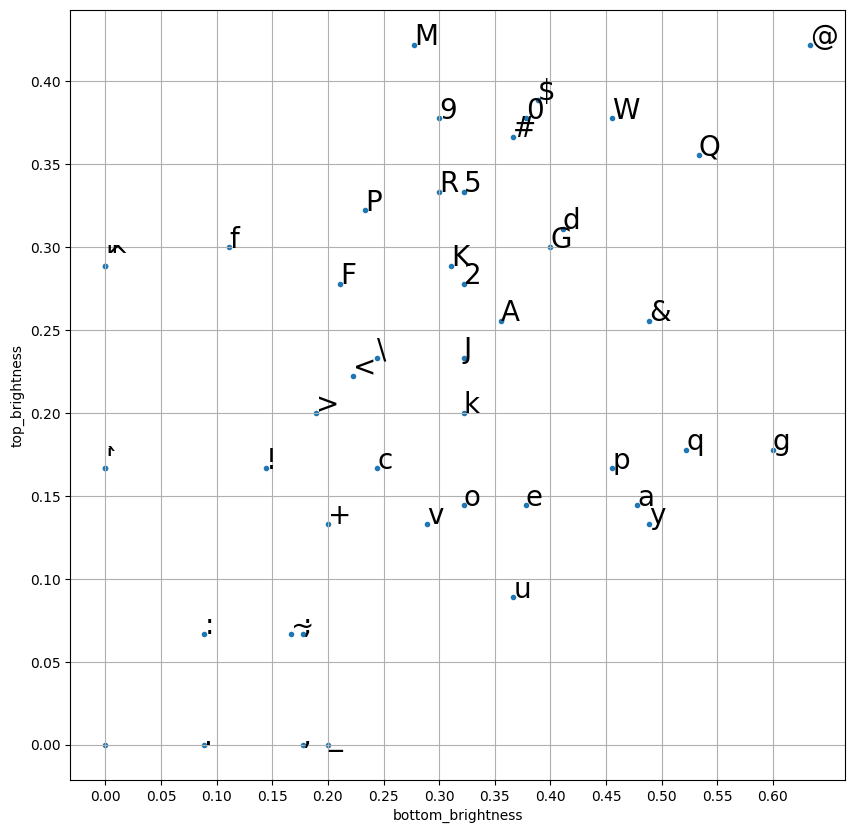

In [12]:
plt.figure(figsize=(10, 10))
b_top_brightness = [a[1][0] for a in b_list]
b_bottom_brightness = [a[1][1] for a in b_list]
plt.scatter(b_bottom_brightness, b_top_brightness, marker='.')
plt.xticks(np.arange(min(b_bottom_brightness), max(b_bottom_brightness), 0.05))
plt.yticks(np.arange(min(b_top_brightness), max(b_top_brightness), 0.05))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(b_list)):
    plt.annotate(b_list[i][0], (b_bottom_brightness[i], b_top_brightness[i]), size=20)
plt.grid()